In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Link del dataset: https://www.kaggle.com/datasets/whenamancodes/netflix-prime-video-disney-hulu

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Información General

In [5]:
shows = pd.read_csv("data/tv_shows.csv", index_col = 0)
shows.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [69]:
print(f" El dataframe es un excel con información de series y películas que se encuentran disponibles en diferentes plataformas. En el dataset hay {shows.shape[0]} filas y {shows.shape[1]} columnas. Los tipos de datos por columnas son: \n  {shows.dtypes}")

 El dataframe es un excel con información de series y películas que se encuentran disponibles en diferentes plataformas. En el dataset hay 5368 filas y 11 columnas. Los tipos de datos por columnas son: 
  ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object


Donde los 1 en Netflix, Hulu, Prime Video y Diney+ significan que el contenido se encuentra disponible en la plataforma y 0 en caso contrario. Para la columna Type, 1 representa a las series y 0 a las películas. Rotten Tomatoes e IMDb son los puntajes de reseña y valoración de cada contenido.

In [70]:
print(f"El dataset shows presenta los siguientes NA: \n {shows.isna().sum()}")

El dataset shows presenta los siguientes NA: 
 ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64


In [14]:
print(f"En porcentajes, la cantidad de faltantes representan: {(shows.Age.isna().sum()/len(shows) * 100).round()}% en Age y {(shows.IMDb.isna().sum()/len(shows) *100).round()}% en IMDb.")

En porcentajes, la cantidad de faltantes representan: 40.0% en Age y 18.0% en IMDb.


In [17]:
shows[shows.IMDb.isna()]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
1055,1058,The Snitch Cartel: Origins,2021,NaN,NaN,51/100,1,0,0,0,1
1120,1123,Gameboys,2020,NaN,NaN,50/100,1,0,0,0,1
1248,1251,Baewatch: Parental Guidance,2019,NaN,NaN,47/100,1,1,0,0,1
1262,1265,Quarantine Tales,2020,NaN,NaN,47/100,1,0,0,0,1
1346,1350,Use for My Talent,2021,NaN,NaN,45/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


Como se puede observar arriba, muchos de los contenidos sin información en su IMDb tampoco tienen especificada la edad correspondiente. En este caso, sería mejor trabajar sin estos datos, que tan solo representan el 18% de todos los valores del dataset.

In [6]:
filter = shows.IMDb.isna()
shows_con_IMDb = shows[~filter].copy()
shows_con_IMDb.tail()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
5339,5687,Wild Chile,2018,7+,7.5/10,30/100,0,0,0,1,1
5340,5688,Howie Mandel's Animals Doing Things,2018,all,3.2/10,30/100,0,0,0,1,1
5341,5690,The Big Fib,2020,all,5.4/10,29/100,0,0,0,1,1
5342,5691,Vampirina: Ghoul Girls Rock!,2018,all,7.7/10,28/100,0,0,0,1,1
5343,5692,Jungle Animal Rescue,2020,NaN,6.4/10,28/100,0,0,0,1,1


In [67]:
print(f"En el dataset ya filtrado, quedaron un total de {shows_con_IMDb['ID'].count()} shows, de los cuales {shows_con_IMDb['Netflix'].sum()} están en Netflix, {shows_con_IMDb['Hulu'].sum()} en Hulu, {shows_con_IMDb['Prime Video'].sum()} en Prime Video y {shows_con_IMDb['Disney+'].sum()} en Diney+. Esto significa 384 de los shows analizados se encuentran en más de una plataforma. ")

En el dataset ya filtrado, quedaron un total de 4406 shows, de los cuales 1875 están en Netflix, 1418 en Hulu, 1182 en Prime Video y 315 en Diney+. Esto significa 384 de los shows analizados se encuentran en más de una plataforma. 


In [79]:
print(f"Los datos de la columna Age también figuran como objects. La clasificación de los shows se divide dentro de las siguientes categorías por edad: \n {shows_con_IMDb['Age'].unique()}")

Los datos de la columna Age también figuran como objects. La clasificación de los shows se divide dentro de las siguientes categorías por edad: 
 ['18+' '16+' '7+' 'all' nan '13+']


## Transformación de Datos

Como las columnas IMDb y Rotten Tomatoes figuran como object, a continuación se cambiará su type a float. Además, para que estén según la misma base, las clasificaciones de Rotten Tomatoes pasarán a ser sobre 10, como el IMDb.


In [12]:
from preprocess import cambiar_imdb
shows_con_IMDb = cambiar_imdb(shows_con_IMDb)

In [13]:
from preprocess import cambiar_tomatoes
shows_con_IMDb = cambiar_tomatoes(shows_con_IMDb)

In [14]:
shows_con_IMDb.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7,9.6,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8,9.4,1,0,0,0,1
4,5,Dark,2017,16+,8.8,9.3,1,0,0,0,1


In [15]:
shows_con_IMDb.describe().round()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
count,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0
mean,2465.0,2012.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0
std,1570.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1934.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
25%,1105.0,2011.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0
50%,2358.0,2016.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0
75%,3800.0,2019.0,8.0,6.0,1.0,1.0,1.0,0.0,1.0
max,5692.0,2021.0,10.0,10.0,1.0,1.0,1.0,1.0,1.0


Se puede observar que los años de producción de las películas y series analizadas va desde el año 1934 hasta el 2021. El año que más se repite dentro del contenido es 2012.
Por otro lado, la puntuación media según IMDb es de 7 mientras que si nos guiamos por Rotten Tomatoes, 5.

Por otro lado, el dataset sólo tiene para analizar series, por lo que la columna Type se puede eliminar.

In [100]:
shows_con_IMDb.drop('Type', axis=1, inplace=True)

In [27]:
shows_con_IMDb.Age = shows_con_IMDb.Age.fillna("nan")

En el caso de los valores de la columna Age, se cambiaron a integers. Los que correspondían a 'all' se transformaron a 0 y los nulos a -1 para identificarlos.

In [29]:
from preprocess import cambio_age
shows_con_IMDb = cambio_age(shows_con_IMDb)

In [101]:
shows_con_IMDb.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
0,1,Breaking Bad,2008,18,9.4,10.0,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
1,2,Stranger Things,2016,16,8.7,9.6,1,0,0,0,Adolescentes,-0.9,Rotten Tomatoes
2,3,Attack on Titan,2013,18,9.0,9.5,1,1,0,0,Adultos,-0.5,Rotten Tomatoes
3,4,Better Call Saul,2015,18,8.8,9.4,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
4,5,Dark,2017,16,8.8,9.3,1,0,0,0,Adolescentes,-0.5,Rotten Tomatoes


### Outliers

In [102]:
shows_con_IMDb.nlargest(5, "Year")

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
31,32,Lupin,2021,18,7.5,8.7,1,0,0,0,Adultos,-1.2,Rotten Tomatoes
64,65,Sweet Tooth,2021,16,7.9,8.4,1,0,0,0,Adolescentes,-0.5,Rotten Tomatoes
82,83,Shadow and Bone,2021,16,7.7,8.2,1,0,0,0,Adolescentes,-0.5,Rotten Tomatoes
180,181,Ginny & Georgia,2021,16,7.5,7.5,1,0,0,0,Adolescentes,0.0,Rotten Tomatoes
203,204,Young Royals,2021,-1,8.6,7.4,1,0,0,0,Indefinido,1.2,IMDb


In [103]:
shows_con_IMDb.nsmallest(5, "Year")

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
2406,2483,The Three Stooges,1934,0,8.6,6.2,0,1,0,0,Todo público,2.4,IMDb
4006,4289,Studio One,1948,-1,7.8,4.3,0,0,1,0,Indefinido,3.5,IMDb
2146,2187,I Love Lucy,1951,0,8.4,7.2,0,1,0,0,Todo público,1.2,IMDb
3856,4122,The Roy Rogers Show,1951,-1,7.2,4.8,0,0,1,0,Indefinido,2.4,IMDb
3559,3751,The Honeymooners,1952,0,8.6,6.6,0,0,1,0,Todo público,2.0,IMDb


En el caso de los años más actuales, no se observan outliers dentro del contenido. No así en la parte inferior, puesto que la serie del año 1934 tiene una diferencia de 14 años con el contenido siguiente. A pesar de esp, al tener todos los campos completos su análisis es relevante su análisis.

## Variables de Interes

Para trabajar con el público al que está orientado cada show, se creará una nueva variable llamada Target, donde se agrupe según edad a quiénes está orientado. La clasificación es:
18: adultos
16 y 13: adolescentes
7: niños
0: todo público
-1: indefinido

In [38]:
from preprocess import target
shows_con_IMDb["Target"] = shows_con_IMDb["Age"].apply(target)

In [104]:
shows_con_IMDb.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
0,1,Breaking Bad,2008,18,9.4,10.0,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
1,2,Stranger Things,2016,16,8.7,9.6,1,0,0,0,Adolescentes,-0.9,Rotten Tomatoes
2,3,Attack on Titan,2013,18,9.0,9.5,1,1,0,0,Adultos,-0.5,Rotten Tomatoes
3,4,Better Call Saul,2015,18,8.8,9.4,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
4,5,Dark,2017,16,8.8,9.3,1,0,0,0,Adolescentes,-0.5,Rotten Tomatoes


De esta forma, en el dataset se observa la siguiente cantidad de shows por categoría:

In [129]:
shows_con_IMDb.groupby('Target').agg(cantidad_de_shows = ('ID', 'count'))

,cantidad_de_shows
Target,
Adolescentes,996
Adultos,852
Indefinido,1199
Niños,824
Todo público,535


Como se puede observar, dejando de lado los shows que no especifican la edad, la mayor cantidad de shows estan dirigidos a público adolescente, luego adultos y en tercer lugar a niños.

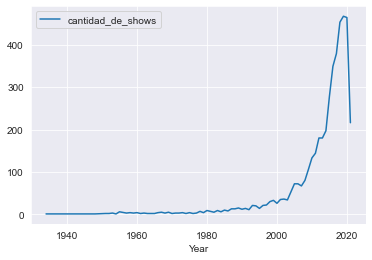

In [180]:
shows_por_anio = shows_con_IMDb.groupby('Year').agg(
    cantidad_de_shows =  ('ID', 'nunique'))
shows_por_anio.plot()
plt.show()

Como se puede observar, la mayor parte del contenido que ofrecen las plataformas se estrenó pasado el año 2000.

A continuación se analizará la variación de las calificaciones de los shows por año. Haciendo una distinción entre IMDb y Rotten Tomatoes.

In [132]:
shows_resenias_generales = shows_con_IMDb.groupby("Year").agg(resenia_imdb = ('IMDb', 'mean'), resenia_rotten_tomatoes = ("Rotten Tomatoes", 'mean'))

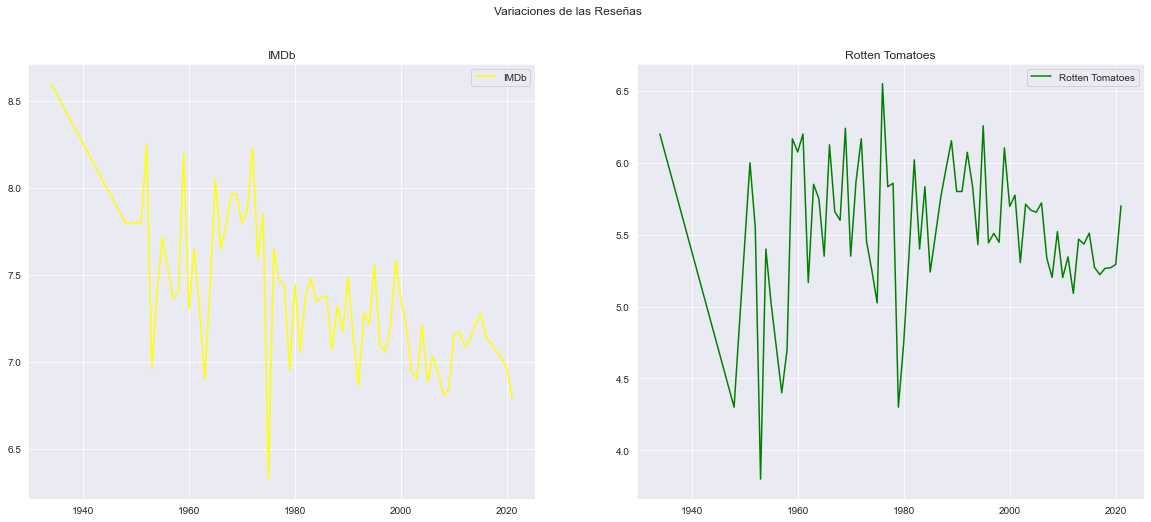

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(shows_resenias_generales["resenia_imdb"], label="IMDb", c="yellow")
axs[0].set_title('IMDb')
axs[0].legend()

axs[1].plot(shows_resenias_generales["resenia_rotten_tomatoes"], label="Rotten Tomatoes", c='green')
axs[1].set_title("Rotten Tomatoes")
axs[1].legend()

plt.suptitle('Variaciones de las Reseñas')
plt.show()

En general, se observa que las calificaciones promedio en IMDb son más altas en comparación con las de Rotten. Sin embargo, hay años en donde ambas siguen la misma tendencia y otros donde no. Por ejemplo, desde el 200 en adelante, aunque las calificaciones de ambos fueron reduciendo su puntaje, a lo último los de IMDb bajaron aún más, mientras que los de Rotten lo incrementaron.

Para tener más clara esta variación, se generó una columna con la diferencia entre ambas calificaciónes. Si el resultado es positivo, IMDb calificó con mejor puntaje al contenido, y si es negativo, la puntuación más alta fue dada por Rotten Tomatoes.

In [40]:
from preprocess import diferencias_de_puntuacion
shows_con_IMDb =diferencias_de_puntuacion(shows_con_IMDb)

In [105]:
shows_con_IMDb.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
0,1,Breaking Bad,2008,18,9.4,10.0,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
1,2,Stranger Things,2016,16,8.7,9.6,1,0,0,0,Adolescentes,-0.9,Rotten Tomatoes
2,3,Attack on Titan,2013,18,9.0,9.5,1,1,0,0,Adultos,-0.5,Rotten Tomatoes
3,4,Better Call Saul,2015,18,8.8,9.4,1,0,0,0,Adultos,-0.6,Rotten Tomatoes
4,5,Dark,2017,16,8.8,9.3,1,0,0,0,Adolescentes,-0.5,Rotten Tomatoes


In [41]:
from preprocess import best_puntuation
shows_con_IMDb["Mejor puntuacion"] = shows_con_IMDb["Diferencia de puntuacion"].apply(best_puntuation)

In [106]:
shows_con_IMDb.tail()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Target,Diferencia de puntuacion,Mejor puntuacion
5339,5687,Wild Chile,2018,7,7.5,3.0,0,0,0,1,Niños,4.5,IMDb
5340,5688,Howie Mandel's Animals Doing Things,2018,0,3.2,3.0,0,0,0,1,Todo público,0.2,IMDb
5341,5690,The Big Fib,2020,0,5.4,2.9,0,0,0,1,Todo público,2.5,IMDb
5342,5691,Vampirina: Ghoul Girls Rock!,2018,0,7.7,2.8,0,0,0,1,Todo público,4.9,IMDb
5343,5692,Jungle Animal Rescue,2020,-1,6.4,2.8,0,0,0,1,Indefinido,3.6,IMDb


In [107]:
print(f" La diferencia de puntuacion más grande entre ambos rankings fue de {shows_con_IMDb['Diferencia de puntuacion'].max()} puntos para el show {shows_con_IMDb[shows_con_IMDb['Diferencia de puntuacion'] == shows_con_IMDb['Diferencia de puntuacion'].max()].Title}")

 La diferencia de puntuacion más grande entre ambos rankings fue de 5.9 puntos para el show 3239    LittleBabyBum
Name: Title, dtype: object


<AxesSubplot:xlabel='Mejor puntuacion'>

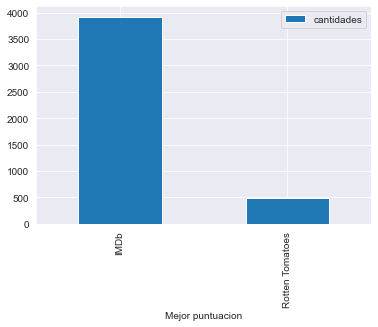

In [204]:
shows_con_IMDb.groupby("Mejor puntuacion").agg(cantidades = ("ID", "count")).plot.bar()

In [202]:
shows_con_IMDb.groupby("Mejor puntuacion").agg(cantidades = ("ID", "count"))

,cantidades
Mejor puntuacion,
IMDb,3921
Rotten Tomatoes,485


Las calificaciones de IMDb son más altas que las de las de Rotten en el 89% de los casos

### Contenido por Plataforma

#### Netflix

In [108]:
shows_Netflix = shows_con_IMDb[shows_con_IMDb.Netflix == 1][['ID', 'Year', 'IMDb', 'Rotten Tomatoes', 'Target']]
shows_Netflix

,ID,Year,IMDb,Rotten Tomatoes,Target
0,1,2008,9.4,10.0,Adultos
1,2,2016,8.7,9.6,Adolescentes
2,3,2013,9.0,9.5,Adultos
3,4,2015,8.8,9.4,Adultos
4,5,2017,8.8,9.3,Adolescentes
...,...,...,...,...,...
4124,4417,1997,6.6,3.9,Indefinido
5064,5385,2021,8.2,8.2,Niños
5097,5425,2015,7.4,6.4,Niños
5231,5575,2019,8.1,4.7,Niños


In [109]:
shows_Netflix.describe().round()

,ID,Year,IMDb,Rotten Tomatoes
count,1875.0,1875.0,1875.0,1875.0
mean,964.0,2016.0,7.0,6.0
std,622.0,6.0,1.0,1.0
min,1.0,1960.0,1.0,2.0
25%,470.0,2015.0,7.0,4.0
50%,940.0,2018.0,7.0,5.0
75%,1416.0,2019.0,8.0,6.0
max,5650.0,2021.0,9.0,10.0


In [110]:
shows_Netflix_cantidades = shows_Netflix.groupby("Year").agg(media_imdb = ("IMDb", "mean"), media_rotten = ("Rotten Tomatoes", "mean"))
shows_Netflix_cantidades.sort_values(by= 'media_imdb', ascending=False)

,media_imdb,media_rotten
Year,,
1969,8.800000,8.100000
1987,8.400000,7.350000
1966,8.300000,8.200000
1960,8.200000,5.600000
1972,8.200000,4.800000
1995,8.000000,7.433333
2000,7.900000,6.660000
1999,7.775000,6.250000
2002,7.733333,5.800000


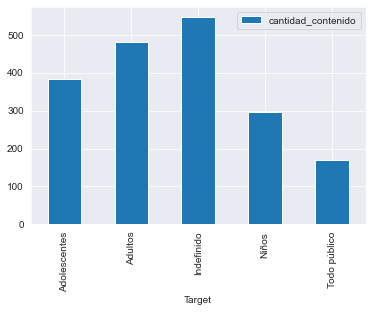

In [123]:
netflix_por_target = shows_Netflix.groupby("Target").agg(cantidad_contenido = ("ID", "count"))
netflix_por_target.plot.bar()
plt.show()

En Netflix sólo se encuentran analizadas series dirigidas principalmente a adultos y adolescentes. La mayoria del contenido fue filmado en 2016. Aquellas filmadas en 1969, 1987, 1966, 1960, 1972 y 1995 tienen en promedio el mejor puntaje en IMDb. Los puntajes hechos en Rotten son mas 'estables' que los IMDb.

#### Hulu

In [111]:
shows_Hulu = shows_con_IMDb[shows_con_IMDb.Hulu == 1][['ID', 'Year', 'IMDb', 'Rotten Tomatoes','Target']]
shows_Hulu

,ID,Year,IMDb,Rotten Tomatoes,Target
2,3,2013,9.0,9.5,Adultos
11,12,2009,8.5,9.0,Niños
13,14,2011,8.5,9.0,Adultos
25,26,2009,9.1,8.8,Adolescentes
29,30,2005,7.5,8.7,Adolescentes
...,...,...,...,...,...
3596,3799,1993,6.8,6.3,Niños
3918,4193,1998,7.6,4.6,Indefinido
4124,4417,1997,6.6,3.9,Indefinido
5231,5575,2019,8.1,4.7,Niños


In [112]:
shows_Hulu.describe().round()

,ID,Year,IMDb,Rotten Tomatoes
count,1418.0,1418.0,1418.0,1418.0
mean,2520.0,2010.0,7.0,6.0
std,738.0,11.0,1.0,1.0
min,3.0,1934.0,2.0,2.0
25%,2238.0,2007.0,7.0,5.0
50%,2640.0,2013.0,7.0,6.0
75%,3022.0,2017.0,8.0,7.0
max,5591.0,2021.0,9.0,10.0


In [85]:
shows_Hulu_cantidades = shows_Hulu.groupby("Year").agg(media_imdb = ("IMDb", "mean"), media_rotten = ("Rotten Tomatoes", "mean"))
shows_Hulu_cantidades.sort_values(by= 'media_imdb', ascending=False)

,media_imdb,media_rotten
Year,,
1959,9.000000,8.600000
1934,8.600000,6.200000
1984,8.500000,6.000000
1968,8.400000,5.100000
1951,8.400000,7.200000
...,...,...
1980,6.500000,4.600000
1960,6.350000,5.850000
1975,6.250000,5.800000


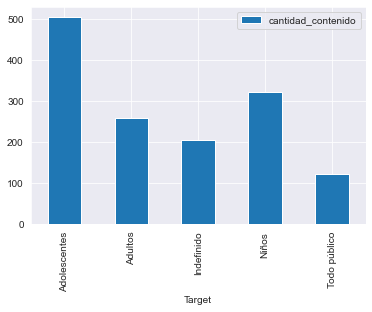

In [121]:
hulu_por_target = shows_Hulu.groupby("Target").agg(cantidad_contenido = ("ID", "count"))
hulu_por_target.plot.bar()
plt.show()

La mayoría del contenido de Hulu fue filmado en el 2010.  En este caso, principalmente dirigidas a un público adolescente y niños. Como en el caso de Netflix, las series en promedio mejor rankeadas son previas al siglo XXI.

#### Prime Video

In [113]:
shows_Prime_Video = shows_con_IMDb[shows_con_IMDb["Prime Video"] == 1][['ID', 'Year', 'IMDb', 'Rotten Tomatoes', 'Target']]
shows_Prime_Video

,ID,Year,IMDb,Rotten Tomatoes,Target
5,6,2005,9.3,9.3,Niños
11,12,2009,8.5,9.0,Niños
13,14,2011,8.5,9.0,Adultos
37,38,2011,8.0,8.6,Adultos
40,41,1987,8.6,8.6,Niños
...,...,...,...,...,...
4482,4784,2011,6.4,2.4,Indefinido
4483,4785,2014,5.6,2.4,Indefinido
4486,4788,2016,4.8,2.4,Indefinido
4487,4789,2008,4.6,2.4,Indefinido


In [114]:
shows_Prime_Video.describe().round()

,ID,Year,IMDb,Rotten Tomatoes
count,1182.0,1182.0,1182.0,1182.0
mean,3779.0,2008.0,7.0,5.0
std,1069.0,13.0,1.0,2.0
min,6.0,1948.0,2.0,2.0
25%,3719.0,2005.0,7.0,4.0
50%,4088.0,2012.0,7.0,5.0
75%,4435.0,2016.0,8.0,6.0
max,4791.0,2021.0,10.0,9.0


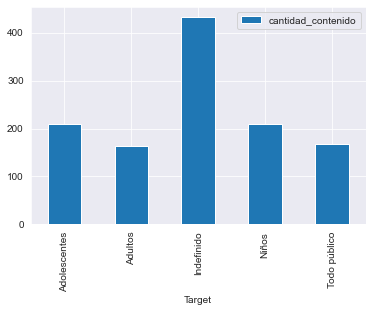

In [94]:
prime_video_target = shows_Prime_Video.groupby("Target").agg(cantidad_contenido = ("ID", "count"))
prime_video_target.plot.bar()
plt.show()

La mayoria de los shows en Prime Video son del año 2008. El contenido ofrecido está principalmente orientado a niños y adolescentes.

#### Diney+

In [115]:
shows_Disney = shows_con_IMDb[shows_con_IMDb["Disney+"] == 1][['ID', 'Year', 'IMDb', 'Rotten Tomatoes', 'Target']]
shows_Disney

,ID,Year,IMDb,Rotten Tomatoes,Target
321,323,2012,7.0,6.9,Niños
833,836,2015,5.5,5.5,Todo público
920,923,2011,6.9,5.3,Adolescentes
1219,1222,2019,7.2,4.8,Todo público
1580,1586,2015,4.6,4.0,Todo público
...,...,...,...,...,...
5339,5687,2018,7.5,3.0,Niños
5340,5688,2018,3.2,3.0,Todo público
5341,5690,2020,5.4,2.9,Todo público
5342,5691,2018,7.7,2.8,Todo público


In [116]:
shows_Disney.describe().round()

,ID,Year,IMDb,Rotten Tomatoes
count,315.0,315.0,315.0,315.0
mean,5140.0,2012.0,7.0,5.0
std,1069.0,11.0,1.0,1.0
min,323.0,1955.0,3.0,3.0
25%,5424.0,2010.0,6.0,4.0
50%,5514.0,2016.0,7.0,5.0
75%,5598.0,2019.0,8.0,6.0
max,5692.0,2021.0,10.0,10.0


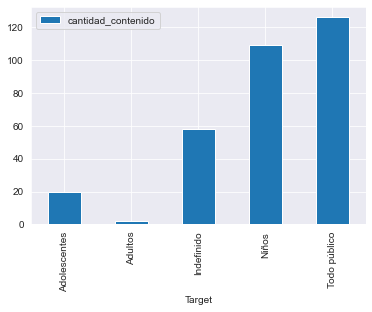

In [120]:
disney_target = shows_Disney.groupby("Target").agg(cantidad_contenido = ("ID", "count"))
disney_target.plot.bar()
plt.show()

En el caso de Disney+, es la plataforma con menor cantidad de series analizadas. La mayoria de su contenido es del año 2012, orientado principalmente a todo público y niños.

Otra variable interesante para analizar, es el contenido repetido entre plataformas y sus valoraciones según los dos rankings utilizados.

Además, para enriquecer más la información obtenida, se podría buscar algún dataset que proporcione la información faltante de edades 'PM' (para mayores de) o si es ATP. Por otro lado, se podría buscar el costo mensual por plataforma para analizar el costo beneficio de cada una.

## Anexo

Para realizar las transformaciones, se utilizó un archivo preprocess.py. A continuación se muestran los códigos de cada función.

In [124]:

def cambiar_imdb(dataframe):
    change_function = (lambda x: (x.split('/')[0]))
    dataframe.loc[:, "IMDb"] = dataframe["IMDb"].apply(change_function).astype("float")
    return dataframe


def cambiar_tomatoes(dataframe):
    change_function = (lambda x: (x.split('/')[0]))
    dataframe.loc[:, "Rotten Tomatoes"] = dataframe["Rotten Tomatoes"].apply(change_function).astype("float") / 10
    return dataframe


def cambio_age(dataframe):
    change_function = (lambda x: (str(x).split('+'))[0])
    dataframe["Age"] = dataframe["Age"].replace("all", "0")
    dataframe["Age"] = dataframe["Age"].replace("nan", "-1")
    dataframe.loc[:, "Age"] = (dataframe["Age"].apply(change_function))
    dataframe.loc[:, "Age"] = dataframe["Age"].astype("int")
    return dataframe


def target(age):
    if age == 18:
        return "Adultos"
    elif age == 16 or age == 13:
        return "Adolescentes"
    elif age == 7:
        return "Niños"
    elif age == 0:
        return "Todo público"
    else:
        return "Indefinido"


def diferencias_de_puntuacion(dataframe):
    dataframe.loc[:, "Diferencia de puntuacion"] = (dataframe["IMDb"] - dataframe["Rotten Tomatoes"]).astype("float")
    return dataframe


def best_puntuation(calification):
    if calification > 0:
        return "IMDb"
    else:
        return "Rotten Tomatoes"
